## K-Means Clustering Example


### Problem Statement
Walmart wants to open a chain of stories across Florida and wants to find out optimal store locations to maximize revenue


In [1]:
# Importing libraries
#necessary to plot in jupyter notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs


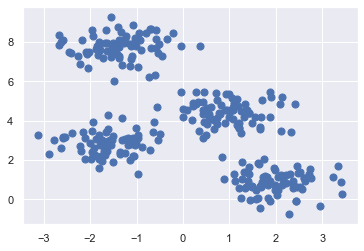

In [2]:
# Loading data with 4 different centers (representing the Walmart stores locations)
x,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Plotting scatter graph with points created
plt.scatter(x[:,0], x[:,1], s=50)

### It is possible to see the four different group of points created with "centers=4"

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_means = kmeans.predict(x)

In [4]:
# Import library
from sklearn.metrics import pairwise_distances_argmin

### Now we gonna create a function that find the clusters centers from data by four steps

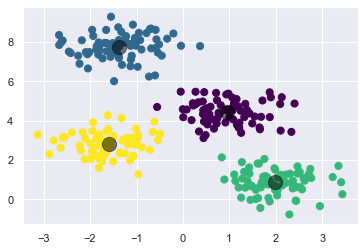

In [55]:
def find_clusters(x, n_clusters, rseed=2):
    # 1. Will randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    
    while True:
        # 2. Will assign labels based on closest center
        # The default distance metric is euclidean
        labels = pairwise_distances_argmin(x,centers)
    
        # 3. Will find new centers from points means
        new_centers = np.array([x[labels ==i].mean(0)
                                for i in range(n_clusters)])

        # 4. Will check for convergence
        # If the centers converge (centers equal to new_centers) the loop stops
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(x,4)
plt.scatter(x[:,0], x[:,1], c=labels, s=50, cmap='viridis')

plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

### Now we can see the optimal centers locations in a table using Pandas library

In [71]:
# Have to import pandas library
import pandas as pd

# Create dataframe with centers data
data = [centers[:,0], centers[:,1]]
df = pd.DataFrame(data,
                  index=['X Coord.', 'Y Coord'], columns=  ['Center 1', 'Center 2', 'Center 3','Center 4'])
df.style

In [95]:
# Or for better visualization, you can transpose the dataframe
data_t = df.T
data_t

X Coord.   Y Coord
Center 1  0.949735  4.419069
Center 2 -1.373244  7.753689
Center 3  1.982583  0.867713
Center 4 -1.584385  2.830813